In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import linear_model

In [33]:
hr = pd.read_csv("/Users/dominicventura/Machine Learning/Neural Network Project/hremployee.csv")

In [34]:
hr = hr.drop(['Over18', 
              'EmployeeCount',
              'EmployeeNumber',
              'StandardHours'
             ], axis = 1)

In [35]:
for column in hr.columns:
    if hr[column].dtype == np.number:
        continue
    hr[column] = LabelEncoder().fit_transform(hr[column])

In [36]:
hr['Age_new'] = hr['Age']
hr = hr.drop('Age', axis = 1)

In [37]:
X = hr.iloc[:, 1:hr.shape[1]].values
y = hr.iloc[:,0].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=26) #26-90.5%

In [39]:
#sm = SMOTE(random_state=0, sampling_strategy = 1)

In [40]:
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [41]:
logreg = LogisticRegression(max_iter = 6000)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [42]:
# Training accuracy
logreg.score(X_train, y_train)

0.8629764065335753

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[316,  10],
       [ 25,  17]])

In [44]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.904891304347826
Precision: 0.6296296296296297
Recall: 0.40476190476190477


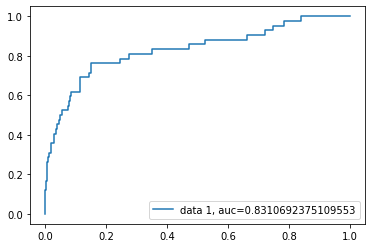

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

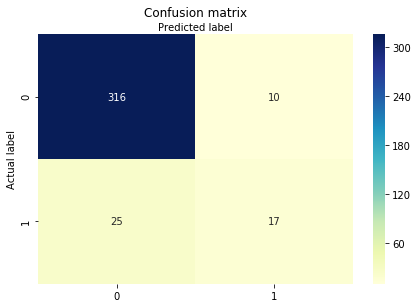

In [46]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05909
Feature: 1, Score: -0.00044
Feature: 2, Score: 0.73114
Feature: 3, Score: 0.04399
Feature: 4, Score: 0.02179
Feature: 5, Score: 0.11844
Feature: 6, Score: -0.42953
Feature: 7, Score: 0.22171
Feature: 8, Score: -0.00288
Feature: 9, Score: -0.45879
Feature: 10, Score: 0.08943
Feature: 11, Score: -0.07129
Feature: 12, Score: -0.38296
Feature: 13, Score: 0.56964
Feature: 14, Score: -0.00184
Feature: 15, Score: 0.00007
Feature: 16, Score: 0.16691
Feature: 17, Score: 1.72119
Feature: 18, Score: -0.04200
Feature: 19, Score: 0.22453
Feature: 20, Score: -0.19236
Feature: 21, Score: -0.24652
Feature: 22, Score: -0.04490
Feature: 23, Score: -0.16730
Feature: 24, Score: -0.24985
Feature: 25, Score: 0.07657
Feature: 26, Score: -0.12665
Feature: 27, Score: 0.15727
Feature: 28, Score: -0.09484
Feature: 29, Score: -0.02563


NameError: name 'pyplot' is not defined

In [48]:
clf = linear_model.Lasso(alpha=0.1)

In [49]:
clf.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
preds = clf.predict(X_test)

In [50]:
metrics.accuracy_score(y_test, preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [54]:
preds = np.argmax(preds, axis=1)

In [55]:
metrics.accuracy_score(y_test, preds)

0.8858695652173914